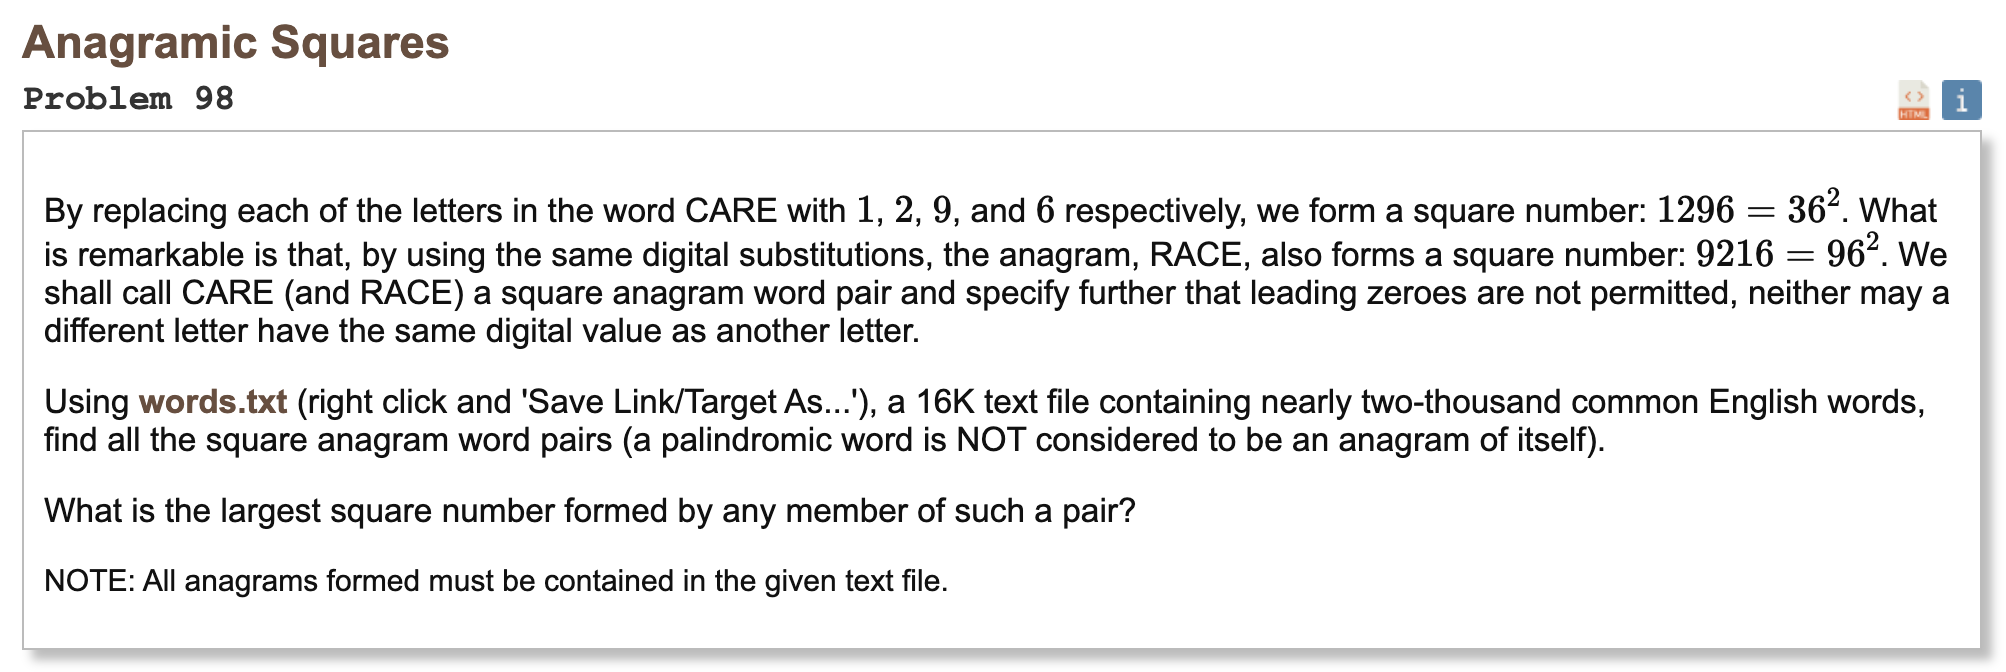

## Initial approach

* Understand the problem: CARE case

* try numbers for each letters
* one letter -> one number
* don't start with 0
* number must be square number

* check square number case with a function

In [1]:
import math

def is_square(n):
    root = int(math.isqrt(n))
    return root*root == n

* function to check letter and number match up
* if match up is valid, return number, else return None

In [2]:
def map_word_to_number(word, number):
    if len(set(word)) != len(set(number)):
        return None
    mapping = dict(zip(word, number))
    mapped = ''.join(mapping[c] for c in word)
    if mapped[0] == '0':
        return None
    return mapped if ''.join(mapping[c] for c in word) == number else None

* Now try CARE

In [3]:
word1 = "CARE"
word2 = "RACE"
square = "1296"

mapped_word2 = map_word_to_number(word1, square)
if mapped_word2:
    mapping = dict(zip(word1, square))
    mapped2 = ''.join(mapping[c] for c in word2)
    print(mapped2)

9216


* 9216, so its valid match up
* Now, text file contains all words to be processed
* we'll find all anagrams in the file
* for all anagrams, check the square and match up case
* finally find the largest square number

In [4]:
from itertools import combinations

In [5]:
with open("0098_words.txt") as f:
    content = f.read()
    words = content.replace('"', '').split(',')

anagram_groups = {}
for word in words:
    key = ''.join(sorted(word))
    anagram_groups.setdefault(key, []).append(word)

anagram_pairs = []
for group in anagram_groups.values():
    if len(group) >= 2:
        for pair in combinations(group, 2):
            anagram_pairs.append(pair)

In [6]:
%%time

max_square = 0

for w1, w2 in anagram_pairs:
    length = len(w1)
    min_root = int(math.ceil(math.sqrt(10 ** (length - 1))))
    max_root = int(math.floor(math.sqrt(10 ** length)))
    squares = [str(i * i) for i in range(min_root, max_root + 1)]

    for square in squares:
        mapped = map_word_to_number(w1, square)
        if not mapped:
            continue
        mapping = dict(zip(w1, square))
        try:
            w2_mapped = ''.join(mapping[c] for c in w2)
        except KeyError:
            continue
        if w2_mapped[0] != '0' and is_square(int(w2_mapped)):
            if int(square) == 18769 or int(w2_mapped) == 18769:
                print(w1, square, w2, w2_mapped)
            max_square = max(max_square, int(square), int(w2_mapped))



BOARD 17689 BROAD 18769
CPU times: user 28.9 ms, sys: 841 μs, total: 29.7 ms
Wall time: 29.3 ms


* Before pointing out the result, lets see all pairs in one place

In [7]:
print("    ALL PAIRS")
print("-----------------\n")

for w1, w2 in anagram_pairs:
    print(f"{w1} - {w2}")

    ALL PAIRS
-----------------

ACT - CAT
ARISE - RAISE
BOARD - BROAD
CARE - RACE
CENTRE - RECENT
COURSE - SOURCE
CREATION - REACTION
CREDIT - DIRECT
DANGER - GARDEN
DEAL - LEAD
DOG - GOD
EARN - NEAR
EARTH - HEART
EAST - SEAT
EAT - TEA
EXCEPT - EXPECT
FILE - LIFE
FORM - FROM
FORMER - REFORM
HATE - HEAT
HOW - WHO
IGNORE - REGION
INTRODUCE - REDUCTION
ITEM - TIME
ITS - SIT
LEAST - STEAL
MALE - MEAL
MEAN - NAME
NIGHT - THING
NO - ON
NOTE - TONE
NOW - OWN
PHASE - SHAPE
POST - SPOT
POST - STOP
SPOT - STOP
QUIET - QUITE
RATE - TEAR
SHEET - THESE
SHOUT - SOUTH
SHUT - THUS
SIGN - SING
SURE - USER
THROW - WORTH


In [8]:
print("Result:", max_square)

Result: 18769
